# Building Regression Model with Keras

In this project, I will build a regression model using the deep learning Keras library, and then I will experiment with increasing the number of training epochs and changing number of hidden layers and you will see how changing these parameters impacts the performance of the model.

## A. Build a baseline model

###  Download and Clean Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
concrete_data = pd.read_csv('https://cocl.us/concrete_data')
concrete_data.head()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
concrete_data.shape

(1030, 9)

Check the dataset for any missing values

In [4]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The dataset is clean and ready to be analyzed.

### Spliting data into predictors and target

In [6]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [7]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [8]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [9]:
# number of predictors
n_cols = predictors.shape[1] 
n_cols

8

### Importing Keras

In [10]:
import keras

2024-06-25 18:16:45.747323: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
from keras.models import Sequential
from keras.layers import Dense

### Building Neural Network

The function below creates a model that has one hidden layer with 10 neurons and a ReLU activation function. 

It uses the adam optimizer and the mean squared error as the loss function.

In [12]:
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model_A = regression_model()

/Users/lxt/anaconda3/envs/GenAI/lib/python3.12/site-packages/keras/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Let's import train_test_split function from scikit-learn in order to split the data into a training and test sets.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Splitting the data by reserving 30% for test set.
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

### Train and Test the Network

In [15]:
# build the model
model = regression_model()

# fit the model
model.fit(predictors, target, epochs=50, verbose=2)

Epoch 1/50


/Users/lxt/anaconda3/envs/GenAI/lib/python3.12/site-packages/keras/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 - 1s - 25ms/step - loss: 10692.6387
Epoch 2/50
33/33 - 0s - 2ms/step - loss: 4606.8887
Epoch 3/50
33/33 - 0s - 2ms/step - loss: 3632.6411
Epoch 4/50
33/33 - 0s - 1ms/step - loss: 2926.3567
Epoch 5/50
33/33 - 0s - 2ms/step - loss: 2225.8030
Epoch 6/50
33/33 - 0s - 2ms/step - loss: 1817.5424
Epoch 7/50
33/33 - 0s - 2ms/step - loss: 1506.6068
Epoch 8/50
33/33 - 0s - 2ms/step - loss: 1299.9904
Epoch 9/50
33/33 - 0s - 2ms/step - loss: 1123.5082
Epoch 10/50
33/33 - 0s - 3ms/step - loss: 949.5906
Epoch 11/50
33/33 - 0s - 3ms/step - loss: 822.6143
Epoch 12/50
33/33 - 0s - 2ms/step - loss: 716.5790
Epoch 13/50
33/33 - 0s - 2ms/step - loss: 605.9073
Epoch 14/50
33/33 - 0s - 1ms/step - loss: 528.8033
Epoch 15/50
33/33 - 0s - 1ms/step - loss: 455.9988
Epoch 16/50
33/33 - 0s - 2ms/step - loss: 391.3700
Epoch 17/50
33/33 - 0s - 1ms/step - loss: 337.4530
Epoch 18/50
33/33 - 0s - 2ms/step - loss: 283.5761
Epoch 19/50
33/33 - 0s - 2ms/step - loss: 247.2848
Epoch 20/50
33/33 - 0s - 2ms/step - loss

In [16]:
from sklearn.metrics import mean_squared_error


In [17]:
# list of 50 mean squared errors
total_mean_squared_errors = 50
epochs = 50
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

mean_squared_errors = np.array(mean_squared_errors)
mean_mse = np.mean(mean_squared_errors)
sd_mse = np.std(mean_squared_errors)

print('\n')
print("Mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors without normalized data. \n Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean_mse))
print("Standard Deviation: "+str(sd_mse))

MSE 1: 68.07587432861328
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE 2: 80.77782440185547
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 3: 67.05425262451172
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 4: 75.60987854003906
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step
MSE 5: 63.876625061035156
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
MSE 6: 65.05268859863281
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
MSE 7: 80.9613037109375
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step
MSE 8: 61.64013671875
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 9: 57.005462646484375
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 10: 59.38519287109375
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
MSE 11: 49.52511978149414
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 12: 49.041542053222656
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 13: 58.27982711791992
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 14: 60.169456481933594
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 15: 55.79655838012695
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 16: 44.781

## B. Normalize the data

In [18]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [19]:
model_B = regression_model()
X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3)

y_test.head()

/Users/lxt/anaconda3/envs/GenAI/lib/python3.12/site-packages/keras/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


617     9.31
430    24.28
838    27.68
522    44.52
298    48.15
Name: Strength, dtype: float64

In [20]:
model_B.fit(X_train, y_train, validation_split=0.3, epochs=50, verbose=2)

Epoch 1/50
16/16 - 1s - 77ms/step - loss: 1648.3643 - val_loss: 1485.5043
Epoch 2/50
16/16 - 0s - 6ms/step - loss: 1627.9567 - val_loss: 1474.5823
Epoch 3/50
16/16 - 0s - 5ms/step - loss: 1627.2078 - val_loss: 1463.6111
Epoch 4/50
16/16 - 0s - 5ms/step - loss: 1607.3328 - val_loss: 1452.5490
Epoch 5/50
16/16 - 0s - 5ms/step - loss: 1605.0841 - val_loss: 1441.7478
Epoch 6/50
16/16 - 0s - 5ms/step - loss: 1584.6503 - val_loss: 1430.9357
Epoch 7/50
16/16 - 0s - 5ms/step - loss: 1570.0598 - val_loss: 1419.7831
Epoch 8/50
16/16 - 0s - 5ms/step - loss: 1563.8608 - val_loss: 1408.6121
Epoch 9/50
16/16 - 0s - 5ms/step - loss: 1547.4746 - val_loss: 1397.1316
Epoch 10/50
16/16 - 0s - 5ms/step - loss: 1533.9926 - val_loss: 1385.1844
Epoch 11/50
16/16 - 0s - 5ms/step - loss: 1521.0903 - val_loss: 1373.3479
Epoch 12/50
16/16 - 0s - 6ms/step - loss: 1512.4102 - val_loss: 1361.2357
Epoch 13/50
16/16 - 0s - 6ms/step - loss: 1504.5931 - val_loss: 1348.5870
Epoch 14/50
16/16 - 0s - 5ms/step - loss: 1487

In [21]:
y_pred = model_B.predict(X_test)

mean_squared_error(y_test, y_pred)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


753.5317983566122

In [22]:
# list of 50 mean squared errors with normalized data
model_B = regression_model()
total_mean_squared_errors = 50
epochs = 50
mse_list_norm = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=i)
    model_B.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=epochs, verbose=0)
    MSE = model_B.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model_B.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mse_list_norm.append(mean_square_error)

mse_list_norm = np.array(mse_list_norm)
mean_mse_norm = np.mean(mse_list_norm)
sd_mse_norm = np.std(mse_list_norm)

print('\n')
print("Mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors with normalized data. \n Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean_mse_norm))
print("Standard Deviation: "+str(sd_mse_norm))

/Users/lxt/anaconda3/envs/GenAI/lib/python3.12/site-packages/keras/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MSE 1: 551.4764404296875
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
MSE 2: 198.50271606445312
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step
MSE 3: 127.0503158569336
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 4: 103.4461669921875
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 5: 82.29214477539062
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step
MSE 6: 73.56889343261719
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 7: 67.9311752319336
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 8: 43.35761260986328
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 9: 48.411373138427734
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MSE 10: 44.85700988769531
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 11: 39.766197204589844
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 12: 36.84375
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 13: 44.72970199584961
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 14: 44.741886138916016
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 15: 34.20431137084961
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 16: 30.3290405273437

## C. Increate the number of epochs

In [23]:
model_C = regression_model()

/Users/lxt/anaconda3/envs/GenAI/lib/python3.12/site-packages/keras/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3)

y_test.head()

36     30.08
728    31.74
38     42.23
111    55.90
561    33.08
Name: Strength, dtype: float64

In [25]:
model_C.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
16/16 - 1s - 61ms/step - loss: 1527.8424 - val_loss: 1487.4615
Epoch 2/100
16/16 - 0s - 4ms/step - loss: 1516.7219 - val_loss: 1475.1865
Epoch 3/100
16/16 - 0s - 5ms/step - loss: 1504.1189 - val_loss: 1462.8893
Epoch 4/100
16/16 - 0s - 4ms/step - loss: 1486.0966 - val_loss: 1450.3912
Epoch 5/100
16/16 - 0s - 4ms/step - loss: 1483.5153 - val_loss: 1437.5349
Epoch 6/100
16/16 - 0s - 5ms/step - loss: 1464.9099 - val_loss: 1424.2053
Epoch 7/100
16/16 - 0s - 5ms/step - loss: 1449.6230 - val_loss: 1410.4608
Epoch 8/100
16/16 - 0s - 5ms/step - loss: 1433.3716 - val_loss: 1396.0966
Epoch 9/100
16/16 - 0s - 4ms/step - loss: 1423.2904 - val_loss: 1381.8763
Epoch 10/100
16/16 - 0s - 5ms/step - loss: 1408.0142 - val_loss: 1366.9093
Epoch 11/100
16/16 - 0s - 5ms/step - loss: 1401.5789 - val_loss: 1351.5293
Epoch 12/100
16/16 - 0s - 4ms/step - loss: 1373.9978 - val_loss: 1335.6635
Epoch 13/100
16/16 - 0s - 5ms/step - loss: 1355.4323 - val_loss: 1319.3876
Epoch 14/100
16/16 - 0s - 5ms/ste

In [26]:
y_pred = model_C.predict(X_test)

mean_squared_error(y_test, y_pred)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


186.0069711945003

In [27]:
# list of 100 mean squared errors with normalized data
model_C = regression_model()
total_mean_squared_errors = 100
epochs = 100
mse_list_norm_100 = []

for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=i)
    model_C.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=epochs, verbose=0)
    MSE = model_C.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model_C.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mse_list_norm_100.append(mean_square_error)

mse_list_norm_100 = np.array(mse_list_norm_100)
mean_mse_norm_100 = np.mean(mse_list_norm_100)
sd_mse_norm_100 = np.std(mse_list_norm_100)

print('\n')
print("Mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors with normalized data. \n Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean_mse_norm_100))
print("Standard Deviation: "+str(sd_mse_norm_100))

/Users/lxt/anaconda3/envs/GenAI/lib/python3.12/site-packages/keras/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MSE 1: 142.47415161132812
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE 2: 98.06053161621094
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step
MSE 3: 60.472084045410156
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
MSE 4: 53.28759765625
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
MSE 5: 45.91236114501953
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 6: 49.22289276123047
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 7: 50.23561096191406
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 8: 38.36103820800781
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 9: 39.57727813720703
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 10: 41.02722930908203
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step
MSE 11: 40.11772918701172
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step
MSE 12: 37.204925537109375
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step
MSE 13: 45.62018585205078
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step
MSE 14: 43.09078598022461
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 15: 40.354034423828125
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 16: 34.

## D. Increase the number of hidden layers

In [28]:
def regression_model_D():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model_D = regression_model_D()

/Users/lxt/anaconda3/envs/GenAI/lib/python3.12/site-packages/keras/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3)

y_test.head()

989    19.99
448    51.72
396    41.37
471    57.03
742    54.28
Name: Strength, dtype: float64

In [30]:
model_D.fit(X_train, y_train, validation_split=0.3, epochs=50, verbose=2)

Epoch 1/50
16/16 - 2s - 98ms/step - loss: 1541.9049 - val_loss: 1466.2676
Epoch 2/50
16/16 - 0s - 6ms/step - loss: 1512.9310 - val_loss: 1443.1031
Epoch 3/50
16/16 - 0s - 5ms/step - loss: 1485.6206 - val_loss: 1414.3662
Epoch 4/50
16/16 - 0s - 5ms/step - loss: 1455.1257 - val_loss: 1377.2780
Epoch 5/50
16/16 - 0s - 5ms/step - loss: 1409.9385 - val_loss: 1327.9036
Epoch 6/50
16/16 - 0s - 5ms/step - loss: 1359.6826 - val_loss: 1263.1024
Epoch 7/50
16/16 - 0s - 5ms/step - loss: 1273.0798 - val_loss: 1181.7490
Epoch 8/50
16/16 - 0s - 5ms/step - loss: 1176.5270 - val_loss: 1083.0708
Epoch 9/50
16/16 - 0s - 5ms/step - loss: 1060.5013 - val_loss: 968.3497
Epoch 10/50
16/16 - 0s - 6ms/step - loss: 936.9034 - val_loss: 837.9088
Epoch 11/50
16/16 - 0s - 5ms/step - loss: 790.3918 - val_loss: 698.9240
Epoch 12/50
16/16 - 0s - 5ms/step - loss: 639.5156 - val_loss: 565.7397
Epoch 13/50
16/16 - 0s - 5ms/step - loss: 512.8250 - val_loss: 454.3957
Epoch 14/50
16/16 - 0s - 5ms/step - loss: 410.2923 - va

In [31]:
y_pred = model_D.predict(X_test)

mean_squared_error(y_test, y_pred)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


102.88729568166188

In [32]:
# list of 50 mean squared errors with normalized data and three hidden layers
model_D = regression_model_D()
total_mean_squared_errors = 50
epochs = 50
mse_list_norm_ml = []

for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=i)
    model_D.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=epochs, verbose=0)
    MSE = model_D.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model_D.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mse_list_norm_ml.append(mean_square_error)

mse_list_norm_ml = np.array(mse_list_norm_ml)
mean_mse_norm_ml = np.mean(mse_list_norm_ml)
sd_mse_norm_ml = np.std(mse_list_norm_ml)

print('\n')
print("Mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors with normalized data. \n Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean_mse_norm_ml))
print("Standard Deviation: "+str(sd_mse_norm_ml))

/Users/lxt/anaconda3/envs/GenAI/lib/python3.12/site-packages/keras/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MSE 1: 94.68505859375
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MSE 2: 72.87254333496094
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 3: 45.043785095214844
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 4: 38.618614196777344
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
MSE 5: 35.2330436706543
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 6: 37.67277526855469
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 7: 42.36659240722656
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 8: 34.104549407958984
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 9: 36.145591735839844
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 10: 34.87469482421875
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 11: 29.716238021850586
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
MSE 12: 26.92343521118164
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step
MSE 13: 32.02882766723633
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 14: 32.55986785888672
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE 15: 30.571269989013672
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MSE 16: 23.1845

## Comparing Mean Squared Error in all the 4 sections

In [33]:
print('\nA')
print('Mean MSE: ', mean_mse)
print('Standard deviation of MSE: ', sd_mse)

print('\nB')
print('Mean MSE (normalized data): ', mean_mse_norm)
print('Standard deviation of MSE (normalized data): ', sd_mse_norm)

print('\nC')
print('Mean MSE (normalized data, 100 epochs): ', mean_mse_norm_100)
print('Standard deviation of MSE (normalized data, 100 epochs): ', sd_mse_norm_100)

print('\nD')
print('Mean MSE (normalized data, 3 hidden layers): ', mean_mse_norm_ml)
print('Standard deviation of MSE (normalized data, 3 hidden layers): ', sd_mse_norm_ml)


A
Mean MSE:  54.62063655055122
Standard deviation of MSE:  8.086717984784507

B
Mean MSE (normalized data):  52.057996145117734
Standard deviation of MSE (normalized data):  76.55609885299444

C
Mean MSE (normalized data, 100 epochs):  36.81601981643332
Standard deviation of MSE (normalized data, 100 epochs):  13.48632291937412

D
Mean MSE (normalized data, 3 hidden layers):  28.696288404419615
Standard deviation of MSE (normalized data, 3 hidden layers):  12.984027119867813


Text(0, 0.5, 'Mean Squared Error')

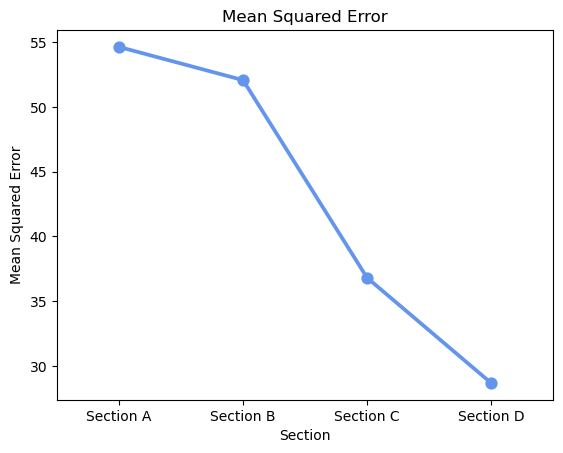

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pointplot(x = ['Section A', 'Section B', 'Section C', 'Section D'], y = [mean_mse,mean_mse_norm,mean_mse_norm_100,mean_mse_norm_ml], color = '#6495ed').set_title('Mean Squared Error')
plt.xlabel('Section')
plt.ylabel('Mean Squared Error')

- Normalization changes the scale of the features, which can sometimes distort the intrinsic relationships in the data or increase the standard deviation by a few outliers, as seen from comparison of Mean and Standard deviation of MSE from parts A and B.

- Doubling the number of epochs had a significant positive effect on the accuracy of the model. We can see that the Mean MSE was 54.62 with 50 epochs (Part B) and Mean MSE with 100 epochs is 36.82! And the standard deviation of MSE with 100 epochs is almost 6 times smaller than with 50 epochs.

- Implementing 3 hidden layers instead of 1 also has increased the accuracy of the model greatly, even better than the result in Part C where we doubled the number of epochs. 